From this GREAT KERNEL: https://www.kaggle.com/cpmpml/smape-weirdness

(please review my one if any errors in r2 arrays/scores)

there're others timeseries related metrics: http://www.neural-forecasting-competition.com/NN3/instructions.htm , https://www.otexts.org/fpp/2/5

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import median_absolute_error,explained_variance_score
from sklearn.metrics import mean_absolute_error,mean_squared_log_error
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


Let's understand how to minimize smape with constant values, like what is done in the best public kernels.  Is the median the right value?
First let us define the smape function.  It is quite straightforward, the only caveat is to treat nan correctly.  Thanks to the official answers on the forum, we know we can use this code.  It handles the case where there are nan in the y_true array, but it assumes there are no nan in the y_pred array.


In [2]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)
    #from https://www.otexts.org/fpp/2/5
    #Hyndman and Koehler (2006) recommend that the sMAPE not be used. 
    #It is included here only because it is widely used, although we will not 
    #use it in this book.


#from http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
def mse(y_true,y_pred):
    #A non-negative floating point value (the best value is 0.0), 
    #or an array of floating point values, one for each individual target.
    return mean_squared_error(y_true, y_pred)
def r2score(y_true, y_pred):
    r2=r2_score(y_true, y_pred)
    r2=max(-.5,r2)*200 # clip from -100 to +200
    return r2
def mdae(y_true, y_pred):
    #A positive floating point value (the best value is 0.0).
    m=median_absolute_error(y_true, y_pred)
    m=min(200,m)
    return m
def mape(y_true, y_pred):
    #MAE output is non-negative floating point. The best value is 0.0.
    m=np.nanmean(np.abs((y_true-y_pred)/y_true) )
    return m*100
def mae(y_true, y_pred):
    #MAE output is non-negative floating point. The best value is 0.0.
    m=mean_absolute_error(y_true, y_pred)*20 #just to scale better
    m=min(200,m)
    return m
def evs(y_true, y_pred):
    #Best possible score is 1.0, lower values are worse.
    m=explained_variance_score(y_true, y_pred)*200
    m=min(0,m)
    return m
def msle(y_true, y_pred):
    #A non-negative floating point value (the best value is 0.0), 
    # or an array of floating point values, one for each individual target.
    m=mean_squared_log_error(y_true, y_pred)*200 
    m=min(200,m)
    return m

Let's start with a simple example where the y_true series to predict contains only one point, say 3.

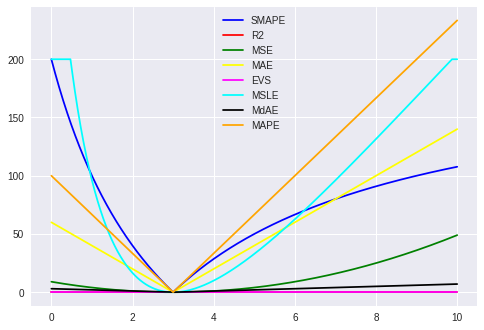

In [3]:
y_true = np.array(3)
y_pred = np.ones(1)
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')

res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res3.append(mse(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res4.append(mae(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res5.append(evs(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res6.append(msle(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res7.append(mdae(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
    res8.append(mape(np.array([y_true]*100).reshape(100,), 
                        np.array([y_pred*i]*100).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()

We see that SMAPE is 0 when the predicted value is equal to the true value.  We also see that an under estimate is penalized more than an over estimate.  Last, we see that the function is not convex for values above the true value.  This may lead to many local minima.  Let's see a second example to check for this, with two values 1 and 9 in the series we try to predict.

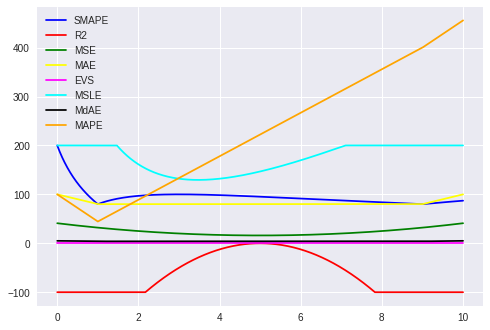

SMAPE min:80.00  at 9.00
SMAPE is :95.24  at median 5.00


In [4]:
y_true = np.array([1,9])
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue', label='SMAPE')
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res3.append(mse(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res4.append(mae(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res5.append(evs(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res6.append(msle(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res7.append(mdae(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res8.append(mape(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

In this case there are two global minima with SMAPE = 80 for the two cases where our constant prediction is equal to one of the value in the true series.  The function reaches a local maxima with SMAPE = 100 for y_pred = 3.  And the value of the median (y_pred = 5) is about 95.24, i.e. it is significantly higher than the global minima.

Does this mean that SMAPE is impossible to optimize?  Let's see if we have more points in our y_true series, for instance a uniformly sampled series:

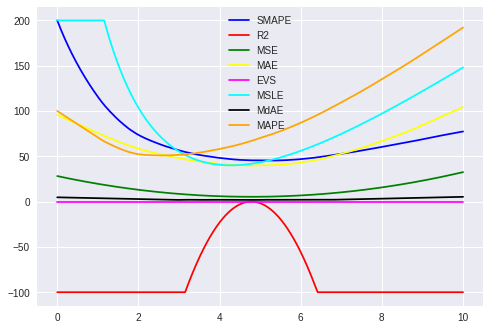

SMAPE min:45.32  at 5.23
SMAPE is :45.60  at median 4.74


In [5]:
np.random.seed(0)
y_true = np.random.uniform(1, 9, 100)
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')
plt.legend()
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res3.append(mse(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res4.append(mae(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res5.append(evs(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res6.append(msle(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res7.append(mdae(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res8.append(mape(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

We see that the minimum of the smape function is met near the median which is good.  It could explain why the public kernels do well.  Let's see with a skewed distribution.

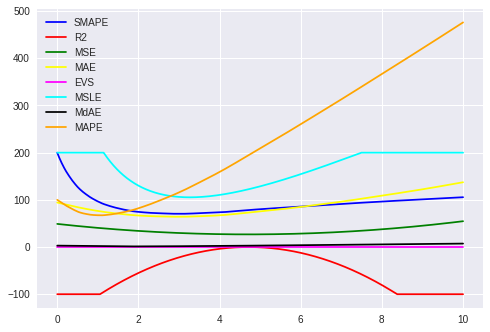

SMAPE min:70.46  at 3.07
SMAPE is :70.49  at median 2.99


In [6]:
np.random.seed(0)
y_true = np.random.lognormal(1, 1, 100)
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res3.append(mse(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res4.append(mae(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res5.append(evs(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res6.append(msle(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res7.append(mdae(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
    res8.append(mape(np.array(y_true).reshape(100,),
                         np.array(y_pred*i).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

Here again the median does well.

Wait a minute.  What is one or more values in the series are 0?   Let's start with one zero only.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: d

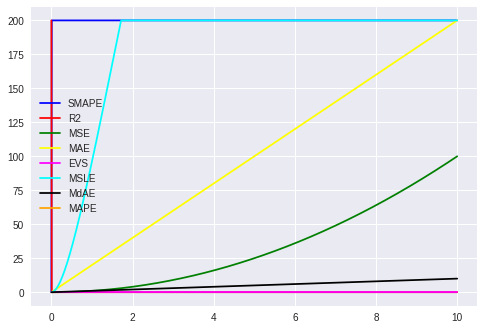

In [7]:
y_true = np.array([0])
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res3.append(mse(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res4.append(mae(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res5.append(evs(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res6.append(msle(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res7.append(mdae(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
    res8.append(mape(np.array([y_true]*100).reshape(100,),
                         np.array([y_pred*i]*100).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()

The function is discontinue at 0.  It is equal to 200 everywhere except at 0 where it equals 0.  Let's now look at two values.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py

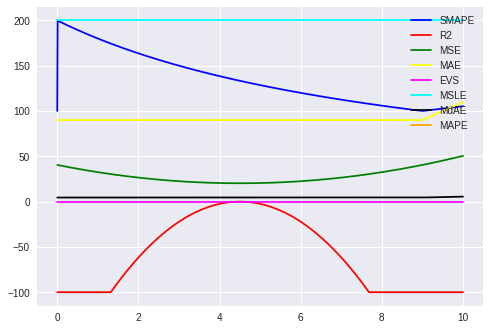

SMAPE min:100.00  at 0.00
SMAPE is :133.33  at median 4.50


In [8]:
np.random.seed(0)
y_true = np.array([0,9])
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res3.append(mse(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res4.append(mae(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res5.append(evs(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res6.append(msle(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res7.append(mdae(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
    res8.append(mape(np.array([y_true]*50).reshape(100,),
                         np.array([y_pred*i]*50).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

Here we have two local minima at 100 when y_pred equals one of the values in the y_true series.   There is a discontinuity at 0. The mathematical limit of the series SMAPE(0, x) when x tends to 0 is 200.  It means that there is no local maxima near 0 as the value 200 cannot be reached.  But we can get values as close as we want to 200.

What if we have more values in the series, but still a proportion of 0?  

There are 50 zeros in the series


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py

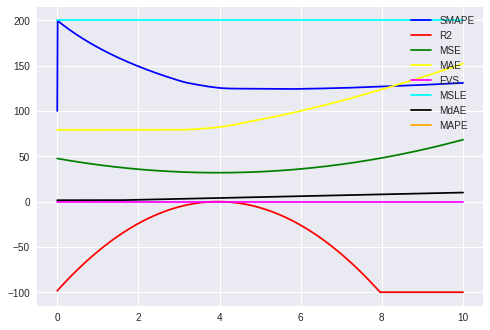

SMAPE min:100.00  at 0.00
SMAPE is :158.23  at median 1.53


In [9]:
np.random.seed(0)
y_true = np.random.lognormal(1, 1, 100)
y_true[y_true < 3] = 0
print('There are %d zeros in the series' % np.sum(y_true == 0))
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res,color='blue',label='SMAPE')
res2,res3,res4,res5,res6,res7,res8=[],[],[],[],[],[],[]
for i in x:
    res2.append(r2score(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res3.append(mse(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res4.append(mae(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res5.append(evs(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res6.append(msle(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res7.append(mdae(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
    res8.append(mape(np.array([y_true]*1).reshape(100,),
                        np.array([y_pred*i]*1).reshape(100,)))
plt.plot(x, res2,color='red',label='R2')
plt.plot(x, res3,color='green',label='MSE')
plt.plot(x, res4,color='yellow',label='MAE')
plt.plot(x, res5,color='magenta',label='EVS')
plt.plot(x, res6,color='cyan',label='MSLE')
plt.plot(x, res7,color='black',label='MdAE')
plt.plot(x, res8,color='orange',label='MAPE')
plt.legend()
plt.show()
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

We see that the median is really not a good choice here and that 0 would be way better.  Moreover, a gradient descent from anywhere except 0 will miss the global minima, by large.

I hope this notebook shows that the discontinuity at 0 makes it tricky to optimize SMAPE with constant predictions.  If you like it then please upvote it (button at the top left).